##`Main Task:` 

Representing 2000k embeddings (obtained from [sentence bert](https://huggingface.co/efederici/sentence-bert-base)) using the  [yelp-dataset](https://github.com/yumeng5/TopClus/tree/main/datasets)

1. We will start by loading the yelp-dataset ✅
2. Next we download the sentence-bert pretrained model ✅
3. We use the PM to extract the embeddings from the text in yelp (we'll also work with STS dataset) ✅
4. Represent the embeddings using t-SNE ✅

In [ ]:
## downloading sentence bert model here:

!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.9 MB/s 
     |████████████████████████████████| 5.5 MB 11.3 MB/s 
     |████████████████████████████████| 1.3 MB 54.6 MB/s 
     |████████████████████████████████| 163 kB 55.0 MB/s 
     |████████████████████████████████| 7.6 MB 46.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=939baf7f93407eb58353f70d17e0da6061e633c7fdafc0f8f38e7ccd15e1a726
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
## import dependencies
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import random

In [ ]:
# here we build a simple function to untar our dataset

def untar_data():
  """input: None

     output: None 
  """
  
  !tar  -xf "/content/drive/MyDrive/data_Allassan_Louis/yelp_data.tar" 


In [ ]:
## untar the yelp data set
untar_data()

In [ ]:
# here we load only 1000 documents from the yelp dataset
def load_data(path):
  """Input: - data_path path to the textfile

     Output: - list containing only 1000 documents
  """
  docs=[]
  textfile= open(path,'r')

  ## looping throught the textfile
  ## the documents looks more like this : an id xhjsfyfhhjsghs(containing 2characters)/follow by the text
  for doc in textfile.readlines():

    content=doc.strip()
    
    docs.append(content[23:])

  ### returning just the first 1000 documents

  return docs

In [ ]:
## loading the data
documents=load_data('/content/texts.txt')

In [ ]:
indices=random.sample(range(5000),2000)
random_docs=[]
for idx in indices:

  random_docs.append(documents[idx])

In [ ]:
#### create embeddings
def create_embeddings(documents):
  # here we create the embedings for each document
  # using the pretrained sentence-BERT model.

  """
  Input: (list)  documents

  Output: (list) of encoded documents (embeddings) 
  """

  model = SentenceTransformer('all-MiniLM-L6-v2')

  embeddings=model.encode(documents)

  return embeddings

In [ ]:
embeddings= create_embeddings(random_docs)

In [ ]:
## importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embeddings)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.275s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.249532
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.145958
[t-SNE] KL divergence after 300 iterations: 2.191892


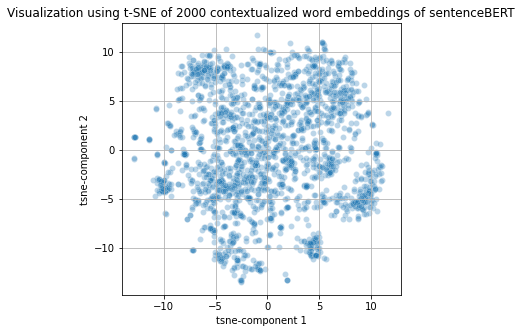

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    #hue="y",
    palette=sns.color_palette("hls", 10),
    #data=df_subset,
    legend="full",
    alpha=0.3
)
plt.title('Visualization using t-SNE of 2000 contextualized word embeddings of sentenceBERT')
plt.xlabel('tsne-component 1')
plt.ylabel('tsne-component 2')
plt.grid()